In [29]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
mouse_id = "7003"
experiment = "clickbait-motivate"
exp_prefix = "m"
num_sessions = 7
cy_f1_dists = [[] for x in range(num_sessions)]
cy_f0_dists = [[] for x in range(num_sessions)]
cy_diffs = []

for ii in range(1, num_sessions):
    session_id = f"{exp_prefix}{ii}"

    # print("=== Testing SessionData Class ===")
    print(f"Loading data for {mouse_id}_{session_id}...")

    data = SessionData(
        mouse_id=mouse_id,
        session_id=session_id,
        experiment=experiment,
        min_spikes=50,
        verbose=False)

    flip_1_df = data.events[data.events['flip_state'] == True] 
    flip_1_df = flip_1_df[flip_1_df['drinking'] == False]
    flip_1_df = flip_1_df[flip_1_df['reward_state'] == False]
    flip_0_df = data.events[data.events['flip_state'] == False] 
    flip_0_df = flip_0_df[flip_0_df['drinking'] == False]
    flip_0_df = flip_0_df[flip_0_df['reward_state'] == False]

    # print(f"f0/f1 frames: {len(flip_1_df)}/{len(flip_0_df)}")
    # print(f"f0/f1 median: {np.median(flip_0_df['centroid_y'])}/{np.median(flip_1_df['centroid_y'])}")
    # cy_diffs.append(np.median(flip_1_df['centroid_y']) - np.median(flip_0_df['centroid_y']))
    cy_f1_dists[ii] = np.array(flip_1_df['nose.y'])
    cy_f0_dists[ii] = np.array(flip_0_df['nose.y'])

Loading data for 7003_m1...
Found 1 7003_m1.avi files
Loading data for 7003_m2...
Found 1 7003_m2.avi files
Loading data for 7003_m3...
Found 1 7003_m3.avi files
Loading data for 7003_m4...
Found 1 7003_m4.avi files
Loading data for 7003_m5...
Found 1 7003_m5.avi files
Loading data for 7003_m6...
Found 1 7003_m6.avi files


In [32]:
data.events.head()

,trial_number,timestamp,poke_left,poke_right,bonsai_centroid_x,bonsai_centroid_y,target_cell,iti,water_left,water_right,...,instance.score,nose.x,nose.y,nose.score,centroid.x,centroid.y,centroid.score,tailbase.x,tailbase.y,tailbase.score
0,0,2025-06-29 17:49:37.278848000,False,False,135,1080,12.0,False,True,False,...,1.466367,99.501976,955.233927,0.000000,124.532814,1068.996704,0.458095,180.300690,1200.798828,0.809152
1,0,2025-06-29 17:49:37.305740800,False,False,134,1081,12.0,False,True,False,...,1.247489,105.962036,958.091451,0.000000,132.198914,1076.879150,0.305710,176.570404,1200.574829,0.805663
2,0,2025-06-29 17:49:37.329971200,False,False,136,1083,12.0,False,True,False,...,1.466298,112.422096,960.948975,0.466937,136.044922,1080.888550,0.219213,176.580551,1208.218018,0.780149
3,0,2025-06-29 17:49:37.355993600,False,False,140,1090,12.0,False,True,False,...,1.547783,108.380486,960.925293,0.671615,136.184158,1084.638306,0.000000,176.561722,1212.726562,0.694614
4,0,2025-06-29 17:49:37.390041600,False,False,142,1097,12.0,False,True,False,...,1.564419,100.484238,969.015686,0.714503,136.323395,1088.388062,0.000000,176.098053,1224.326050,0.700618


C:\Users\hssla\AppData\Local\Temp\ipykernel_64316\2817708358.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


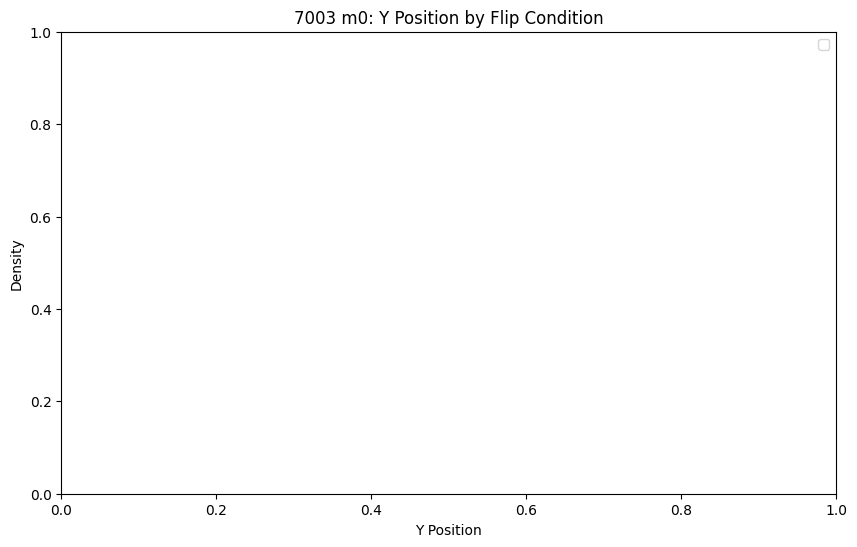

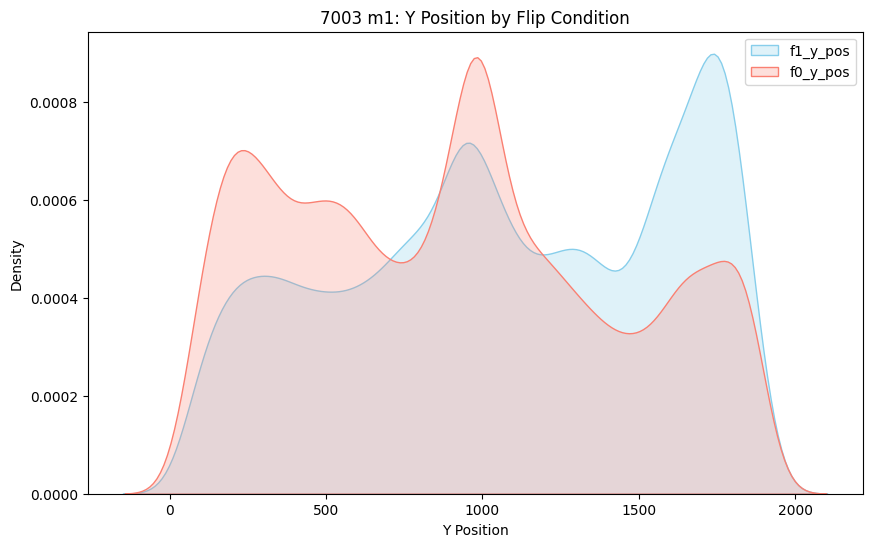

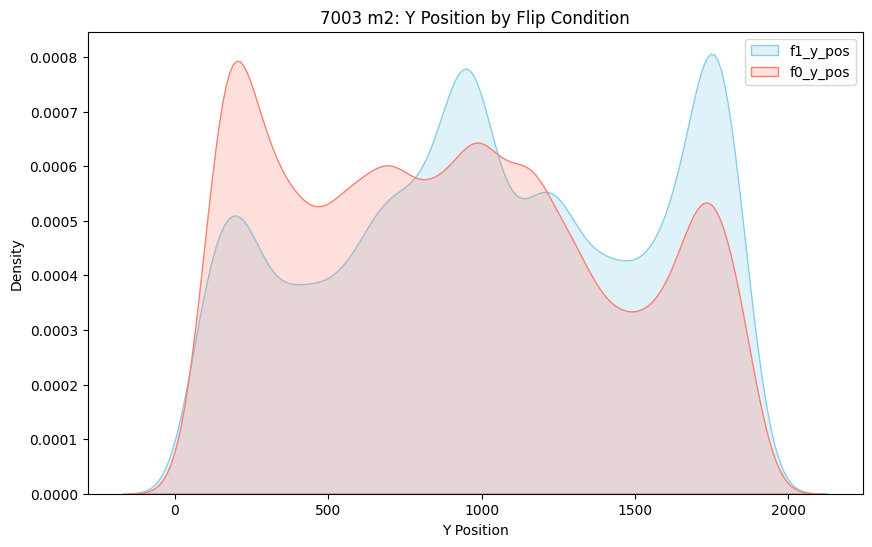

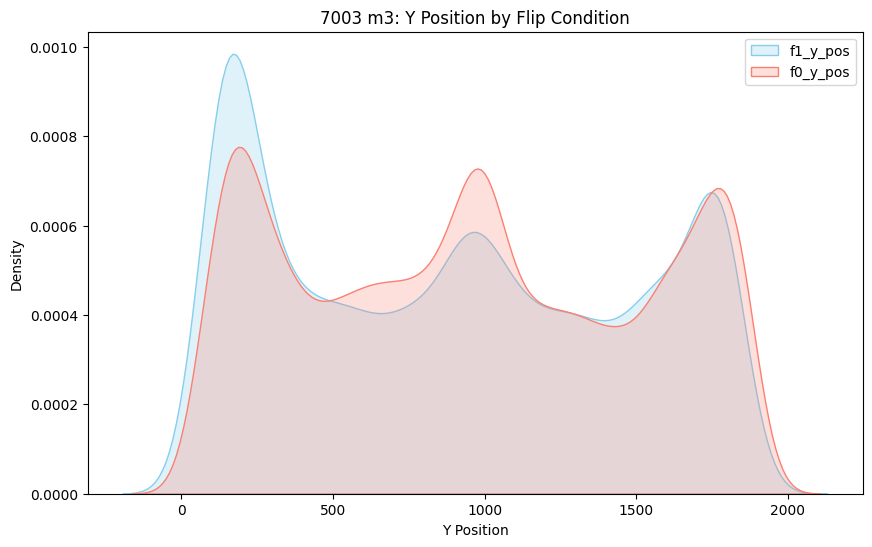

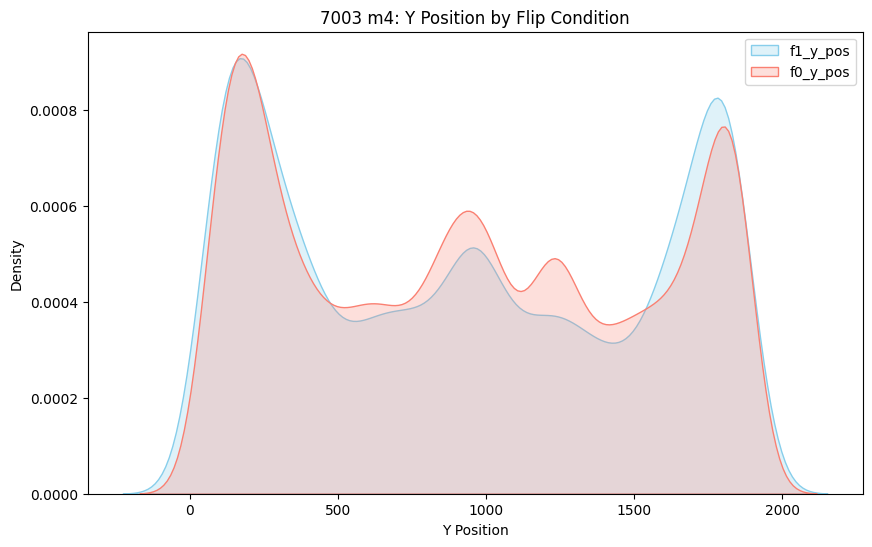

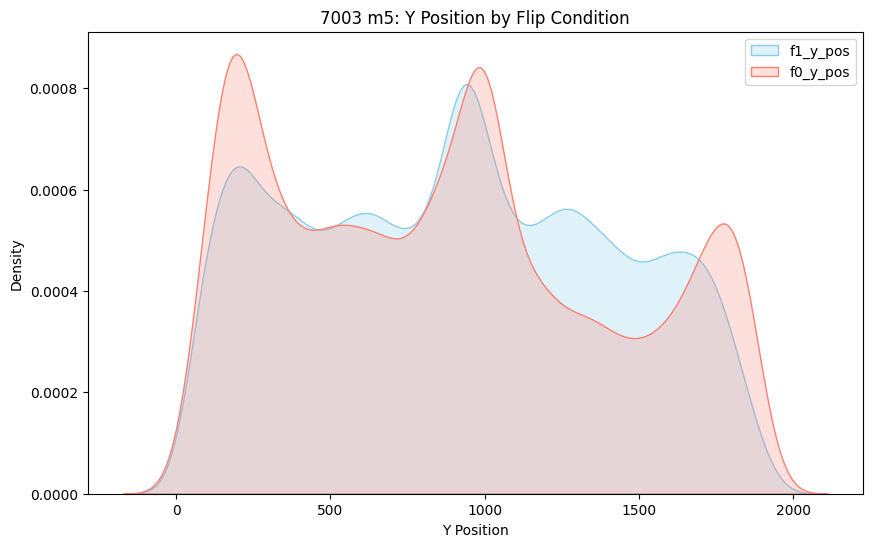

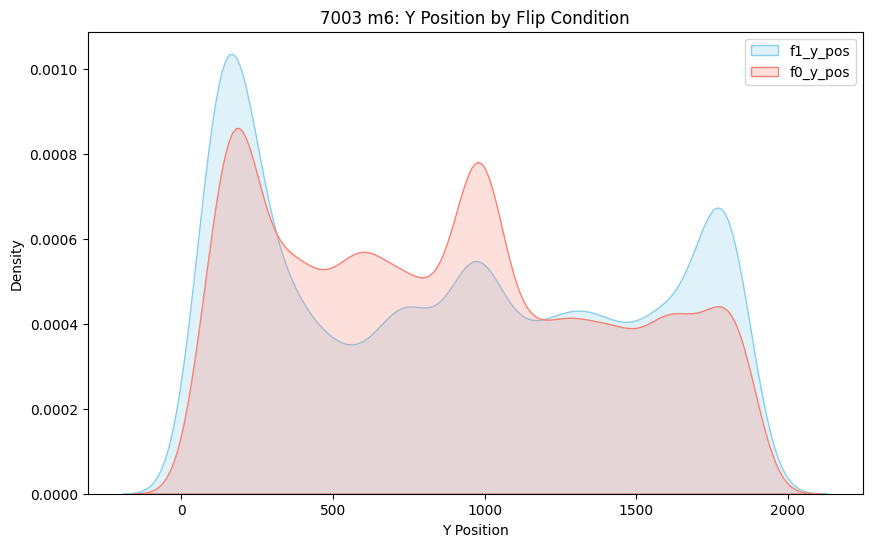

In [31]:
for ii in range(num_sessions):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(cy_f1_dists[ii], label='f1_y_pos', color='skyblue', fill=True, alpha=0.26)
    sns.kdeplot(cy_f0_dists[ii], label='f0_y_pos', color='salmon', fill=True, alpha=0.25)
    plt.title(f"{mouse_id} m{ii}: Y Position by Flip Condition")
    plt.xlabel('Y Position')
    plt.ylabel('Density')
    ax.legend()
    plt.show()